original code: https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

## Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data=pd.read_csv('../input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Summarize null values of data table
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 'Age', 'Cabin', 'Embarked' include null values.

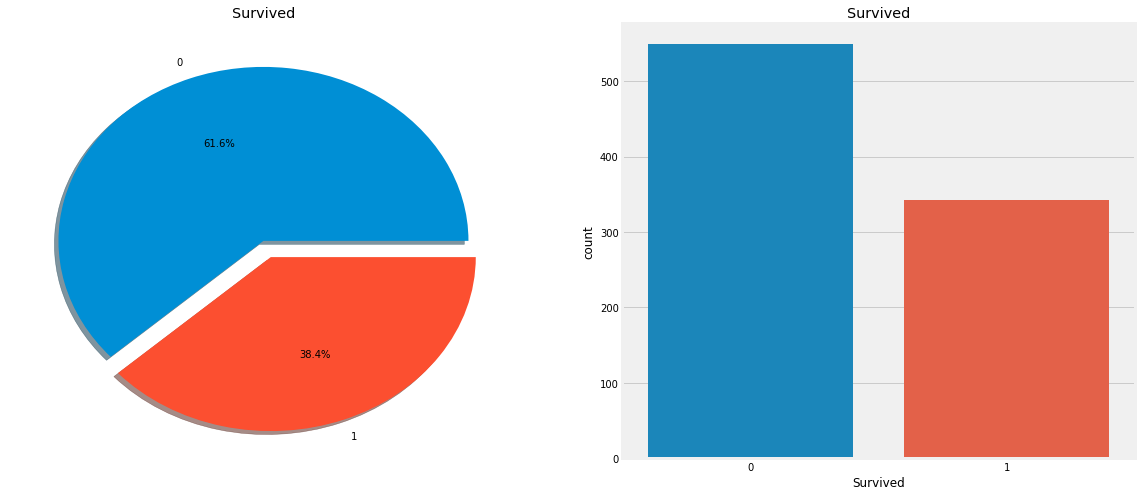

In [5]:
#Visualize the target label 'Survived'
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

- Survival rate: 38.4%

In [6]:
#Analyze the categorial feature 'Sex'
#survival rate by genders
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

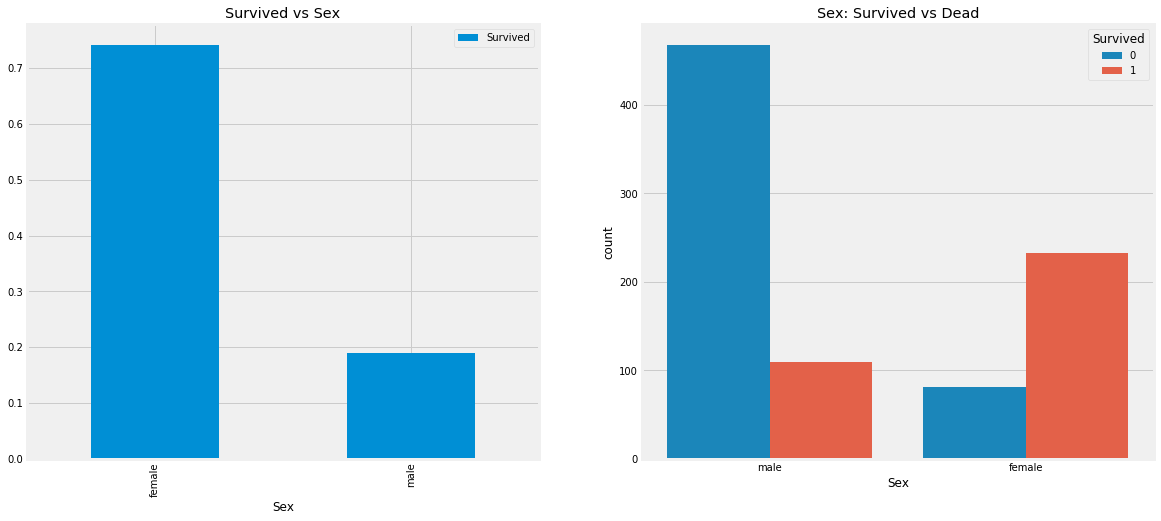

In [7]:
#Visualize the categorial feature 'Sex'
#in relation to the target label 'Survived'
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

- Men boarded the ship in larger numbers.
- Women had a higher survival rate than men.

In [8]:
#Analyze the ordinal feature 'Pclass'
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


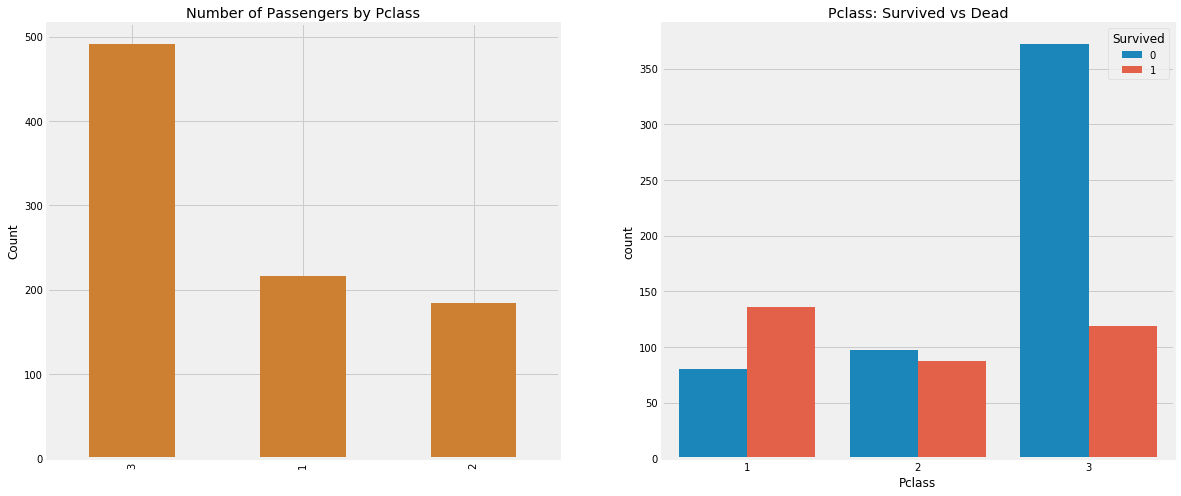

In [9]:
#Visualize the categorial feature 'Pclass'
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

#relation to the target label 'Survived'
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

- Passengers from Pclass3 died more than any other group
- For men, the survival rate decreases as the Pclass becomes more expensive

In [10]:
#Analyze the features 'Sex' and 'Pclass' together
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

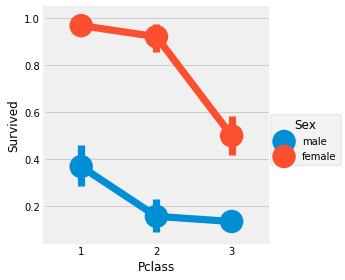

In [11]:
#Analyze the features 'Sex' and 'Pclass' together
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

- Women from Pclass1 have the highest survival rate

In [12]:
#Analyze the continuous feature 'Age'
print(f"oldest passenger: {data['Age'].max()}")
print(f"youngest passenger: {data['Age'].min()}")
print(f"passenger average: {data['Age'].mean()}")

oldest passenger: 80.0
youngest passenger: 0.42
passenger average: 29.69911764705882


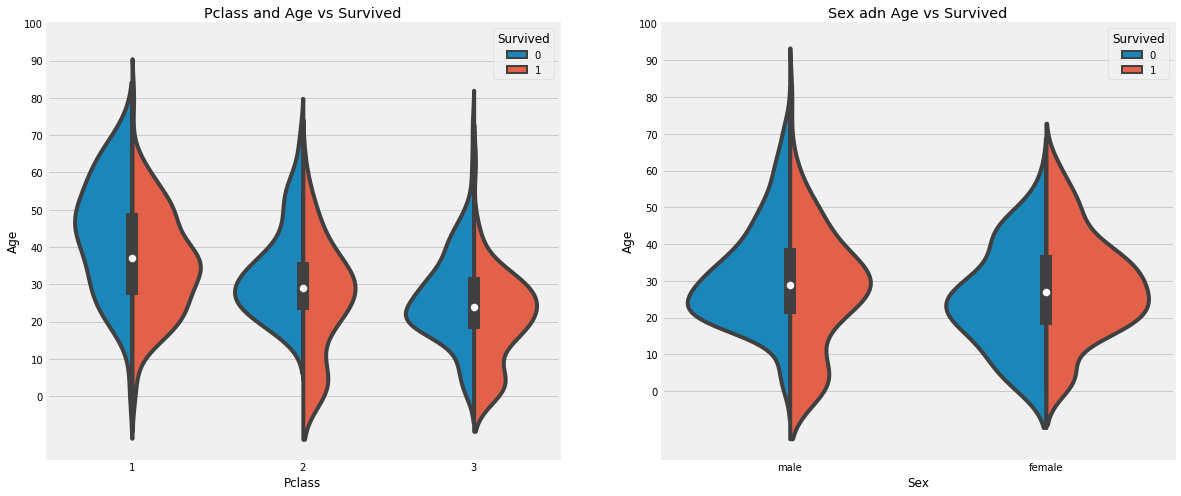

In [13]:
#Visualize the features Age' in relation to the features 'Pclass' and 'Sex', with the target label 'Survived'
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#continuous data -> violin plot
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex adn Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

- The number of children increases with Pclass
- Survived rate increases with the number of children
- Survived rate is lowest among men aged 20-30
- However, people aged 20-40 in Pclass1 have a high survivl rate

In [14]:
#To do feature engineering(remove null data of 'Age'), check the 'Initial' feature
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- So many rate initials

In [15]:
#Group the rare initials to common initials
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], \
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], \
                        inplace=True)

In [16]:
#Check the average 'Age' of each 'Initial'
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- Now we can fill the null values of 'Age'

In [17]:
#Feature engineering: fill the null values of 'Age' based on their 'Initial'
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'),'Age'] = 46

In [18]:
#Check the null valuesof 'Age'
data.Age.isnull().any()

False

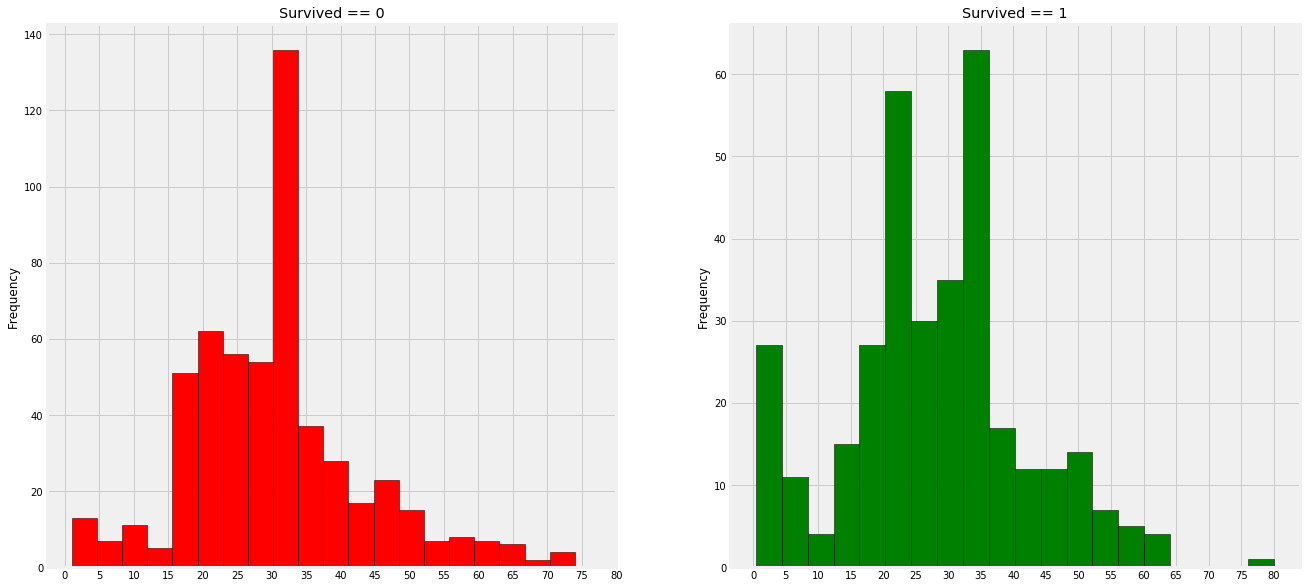

In [19]:
#Visualize the feature 'Age' divided by survived and dead
f, ax = plt.subplots(1, 2, figsize=(20, 10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived == 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived == 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

- Age under five were saved in large number
- Age 30-35 died in large number

In [20]:
#Analyze the categorial features 'Embarked' with 'Sex' and 'Pclass' features for the target label 'Survived'
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

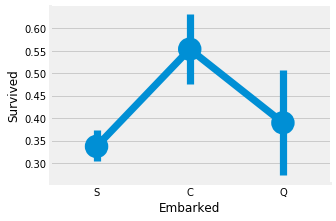

In [21]:
#Visualize the feature 'Embarked' in relation to the target label 'Survived'
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)

plt.show()

- Port C has highest survival rate

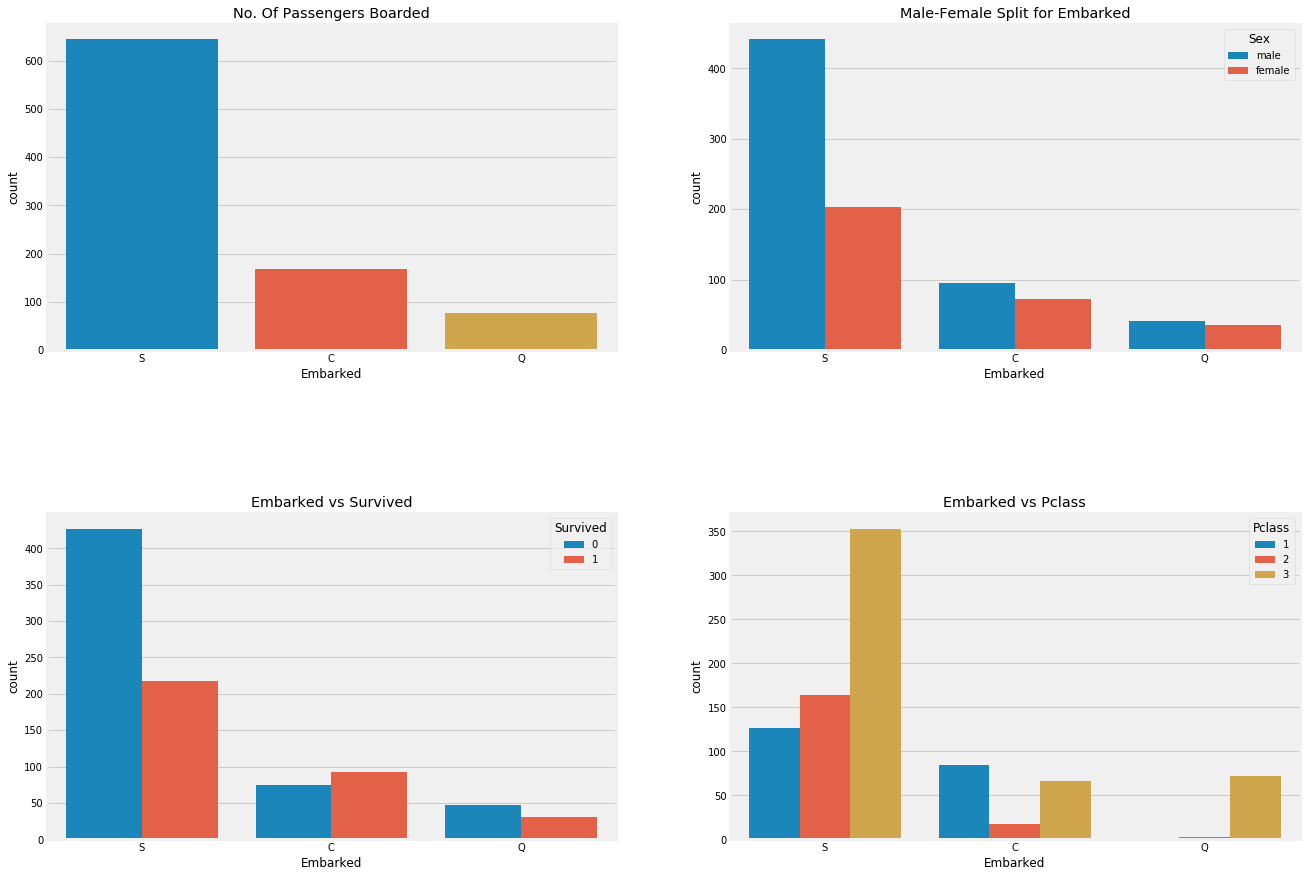

In [22]:
#Visualize the each categories of the feature 'Embarked' with other features and target label again
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- Most of passengers boarded from S
- Port C is the only port where survival rate is over 50%
- Most of passengers from S are Pclass3

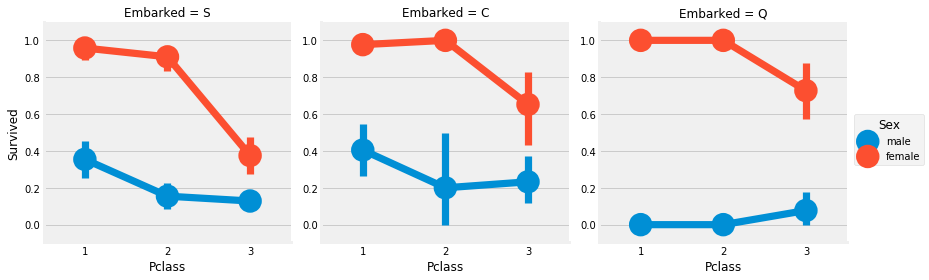

In [23]:
#Visualize the feature 'Pclass' in realtion to the target label 'Survived'
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

- Female survival rate is hight than male from every ports
- Female from port C and Q has similar survival rate but port S' Pclass3 women surival rate is low

In [24]:
#Feature engineering: fill the null value of 'Embarked'
#port S is the major boarding place
data['Embarked'].fillna('S', inplace=True)

In [25]:
#Check null data from 'Embarked'
data.Embarked.isnull().any()

False

In [26]:
#Analyze the discrete feature 'SibSp' in realtion to the target label 'Survived'
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


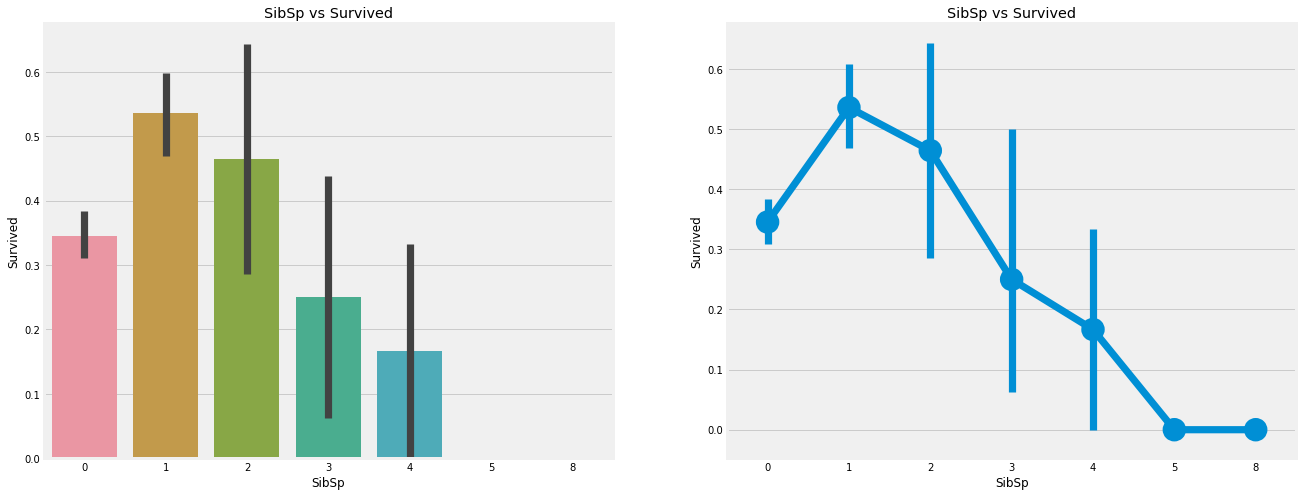

In [27]:
#Visualize the feature 'SibSp'
f,ax=plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

- All of passengers with more than 5 family memebrs died
- Passenger who boarded alone died more than those with one or two family members

In [28]:
#Analyze the discrete feature 'SibSp' and 'Pclass'
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [29]:
#Analyze the feature 'Parch'
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


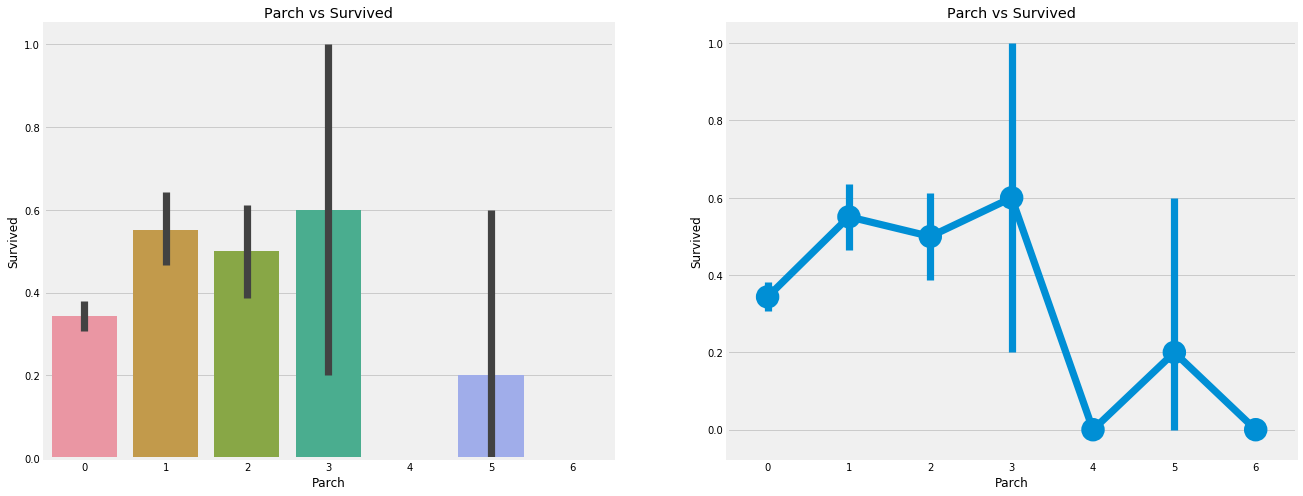

In [30]:
#Visualize the feature 'Parch' with 'Survived'
f,ax=plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('Parch','Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

- Feature 'Parch' is similar with 'SibSp', but passengers with 1-3 parents has better survival rate
- Passenger with over 5 parents memebrs have a better survival rate than those with 4

In [31]:
#Analyze the continuous feature 'Fare'
print(f"Highest fare: {data['Fare'].max()}")
print(f"Lowest fare: {data['Fare'].min()}")
print(f"Fare Average: {data['Fare'].mean()}")

Highest fare: 512.3292
Lowest fare: 0.0
Fare Average: 32.2042079685746


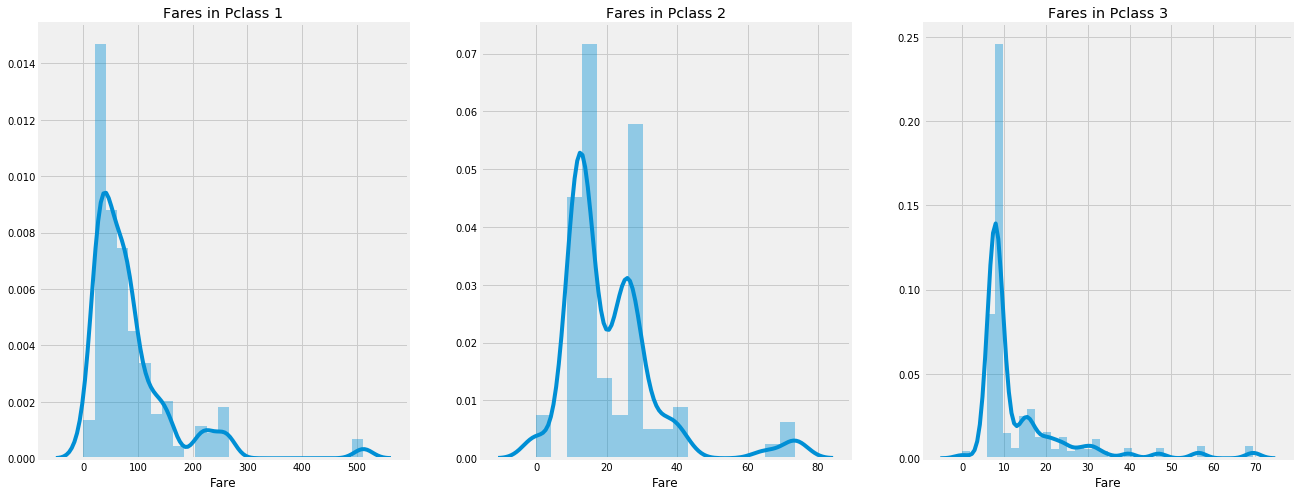

In [32]:
#Visualize the feature 'Fare' and 'Pclass'
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

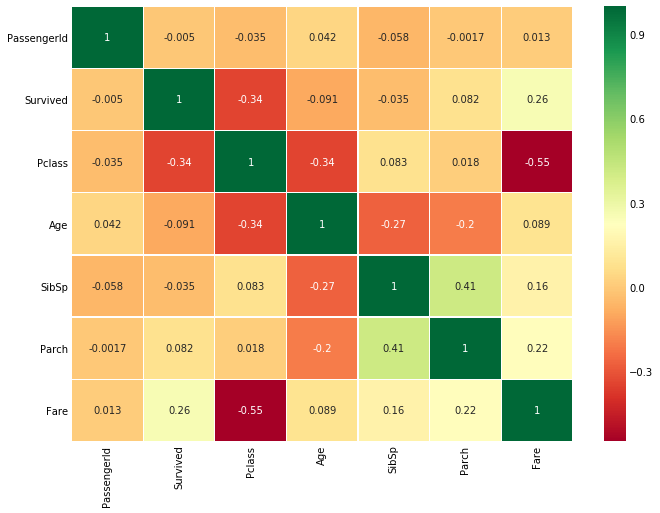

In [33]:
#Visualize the whole features in heatmap plot
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

- 'Parch' and 'SibSp' are highly correlated: 0.41
- 'Pclass' and 'Fare' are negatively correlated: -0.55
- For 'Survived', 'Fare is the most correlated feature

## Feature Engineering and Data Cleaning

In [34]:
#Feature engineering: convert the continuous feature, 'Age', to a categorial feature
#create new feature 'Age_band'
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [35]:
#Analyze the feature 'Age_band'
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


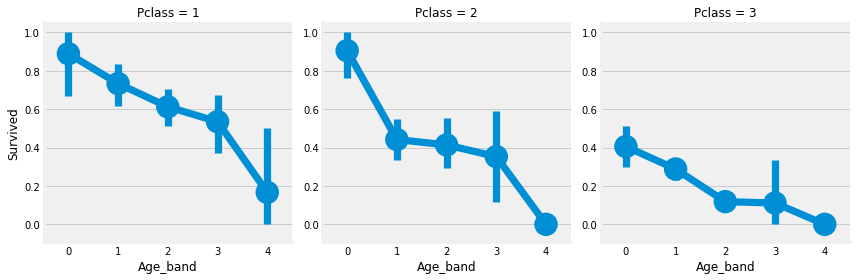

In [36]:
#Visualize the feature 'Age_band' in relation to the target label 'Survived'
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

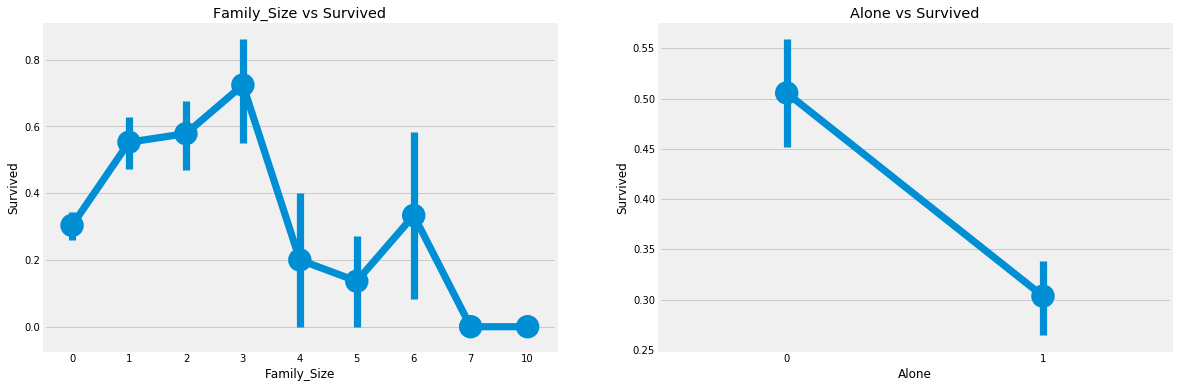

In [37]:
#Feature engineering: merge 'SibSP' and 'Parch'
#create new features 'Family_size' and 'Alone' based on the family size
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1 

f,ax=plt.subplots(1, 2, figsize=(18, 6))

sns.factorplot('Family_Size','Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

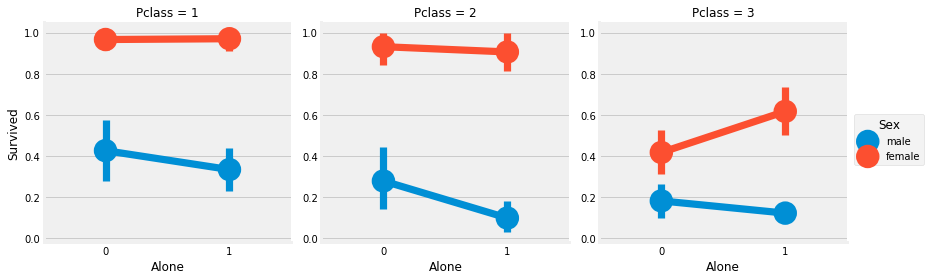

In [38]:
#Visualize the feature 'Alone' in realtion to the target label 'Survived'
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

In [39]:
#Feature engineering: conver the continuous feature 'Fare' to a categorial feature
#to set the range of fare, create new feature 'Fare_range'
data['Fare_Range'] = pd.qcut(data['Fare'], 4) #divide into four group
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [40]:
#Feature engineering: convert the continuous feature 'Fare' to a categorial feature
#based on the range of the feature 'Fare_range', create a new categorial feature 'Fare_cat'
data['Fare_cat']=0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

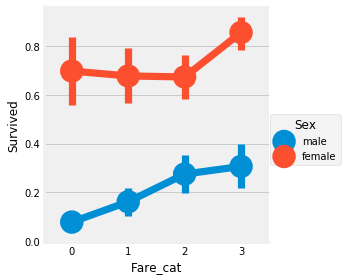

In [41]:
#Visualize the feature 'Fara_cat'
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

In [42]:
#Feature engineering: convert the categorial features' string to number
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

In [43]:
#Drop meaningless features
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

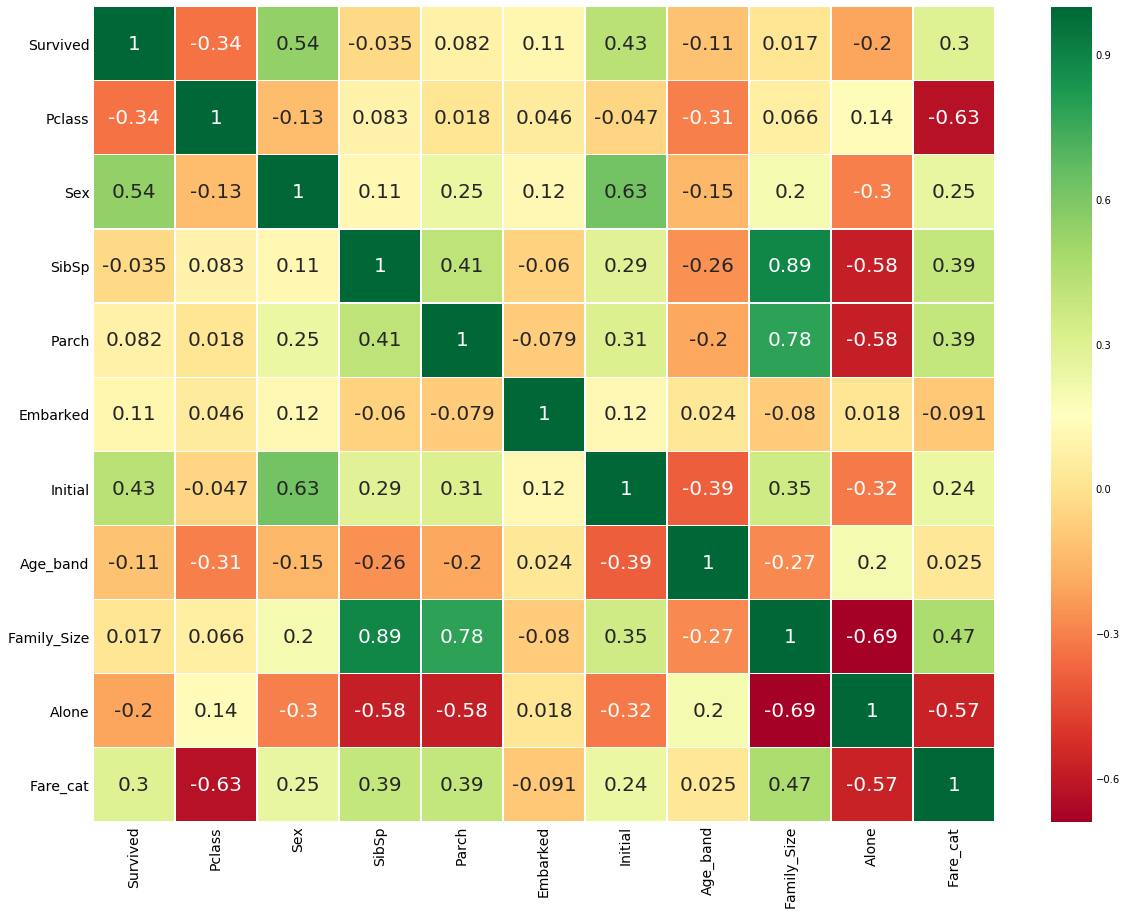

In [44]:
#Visualize the correlation of the features after feature engineering
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig=plt.gcf()
fig.set_size_inches(18, 15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Predictive Modeling
use seven models
- Logistic Regression
- Support Vector Machines(radial)
- Support Vector Machines(linear)
- Random Forest
- K-Nearest Neighbours
- Naive Bayes
- Decision Tree
- Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn import svm #Support Vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbours
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [46]:
#Split the training and test data set
train,test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

In [47]:
#Support Vector Machine(rbf) modeling
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print(f"rbf SVM accuracy: {metrics.accuracy_score(prediction1, test_Y)}")

rbf SVM accuracy: 0.835820895522388


In [48]:
#Support Vector Machine(linear) modeling
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print(f"linear SVM accuracy: {metrics.accuracy_score(prediction2,test_Y)}")

linear SVM accuracy: 0.8171641791044776


In [49]:
#Logistic Regression modeling
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print(f"Logistic Regression accuracy: {metrics.accuracy_score(prediction3,test_Y)}")

Logistic Regression accuracy: 0.8171641791044776


In [50]:
#Decision Tree modeling
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4=model.predict(test_X)
print(f"Decision Tree accuracy: {metrics.accuracy_score(prediction4,test_Y)}")

Decision Tree accuracy: 0.8097014925373134


In [51]:
#K-Nearest Neighbours modeling
model=KNeighborsClassifier() 
model.fit(train_X, train_Y)
prediction5=model.predict(test_X)
print(f"KNN accuracy: {metrics.accuracy_score(prediction5,test_Y)}")

KNN accuracy: 0.832089552238806


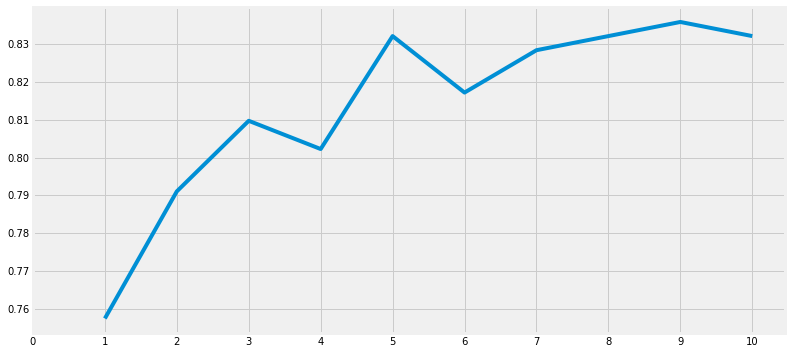

Accuracies: [ 0.75746269  0.79104478  0.80970149  0.80223881  0.83208955  0.81716418
  0.82835821  0.83208955  0.8358209   0.83208955]
Maximum accuracy: 0.835820895522388


In [52]:
#Check how the KNN model accuracy changes based on the value of N
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)

fig=plt.gcf()
fig.set_size_inches(12,6)

plt.show()

print(f"Accuracies: {a.values}")
print(f"Maximum accuracy: {a.values.max()}")

In [53]:
#Naive Bayes modeling
model=GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print(f"Naive Bayes accuracy: {metrics.accuracy_score(prediction6, test_Y)}")

Naive Bayes accuracy: 0.8134328358208955


In [54]:
#Random Forest modeling
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7=model.predict(test_X)
print(f"Random Forest accuracy: {metrics.accuracy_score(prediction7, test_Y)}")

Random Forest accuracy: 0.8171641791044776


- The accuracy can be changed with different training and test data
- Cross validation is required to fix model variance

In [55]:
#Cross validation: K-Fold Cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [56]:
kfold = KFold(n_splits=10, random_state=22)#n=10

classifiers = ['Linear Svm', \
               'Radial Svm', \
               'Logistic Regression', \
               'KNN', \
               'Decision Tree', \
               'Naive Bayes', \
               'Random Forest']

models = [svm.SVC(kernel='linear'), \
          svm.SVC(kernel='rbf'), \
          LogisticRegression(), \
          KNeighborsClassifier(n_neighbors=9), \
          DecisionTreeClassifier(), \
          GaussianNB(), \
          RandomForestClassifier(n_estimators=100)]

xyz = list()
std = list()
accuracy = list()
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)       

new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.808102,0.026143
Naive Bayes,0.801386,0.028999
Random Forest,0.811461,0.035736


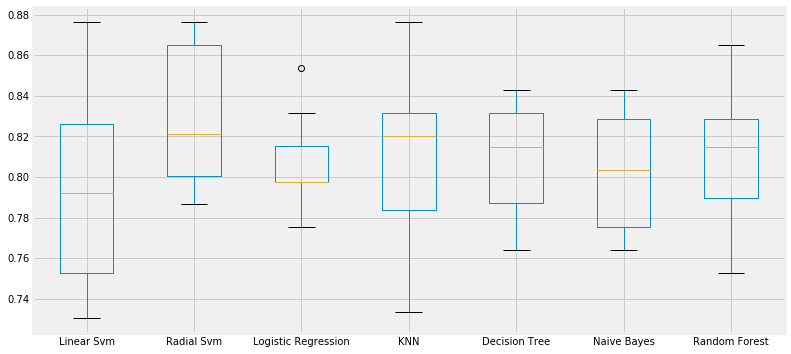

In [57]:
#Visualize the cross validation result
plt.subplots(figsize=(12, 6))
box=pd.DataFrame(accuracy, index=[classifiers])

box.T.boxplot()

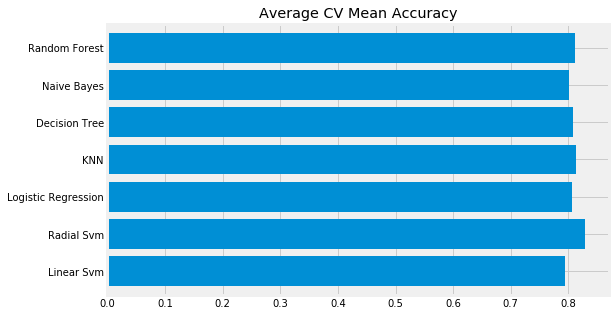

In [58]:
#Visualize the cross validation result
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)

plt.show()

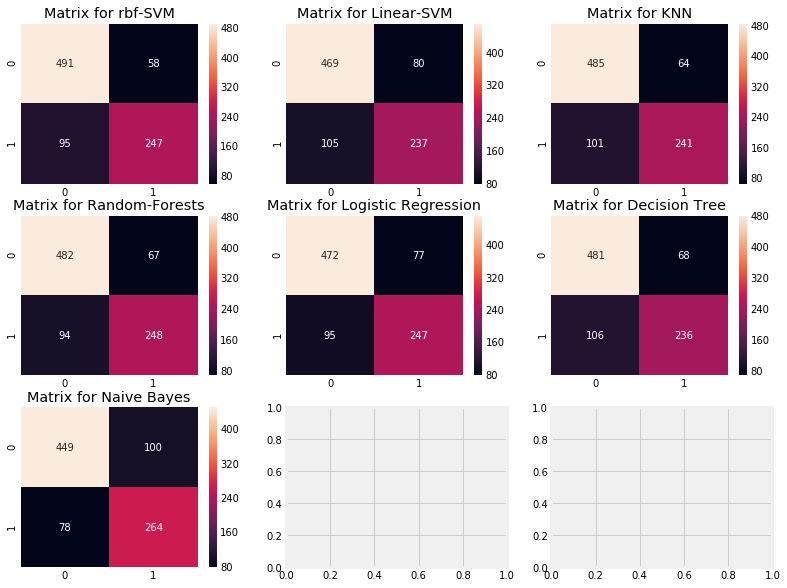

In [59]:
#Visualize the seven models
f, ax = plt.subplots(3, 3, figsize=(12, 10))


y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)

plt.show()

For each heat maps
- The first and fourth quadrants show correct predictions
- The second and third quadrants show incorrect predictions.

- rbf-SVM and Random forest predict precisely than other models

### Hyper-Parameters Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#Paramter tuning for rbf-SVM
C=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

kernel=['rbf', 'linear']
hyper={'kernel': kernel, 'C': C, 'gamma': gamma}

gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   16.8s finished


In [62]:
#Paramter tuning for Randome forest
n_estimators=range(100, 1000, 100)
hyper={'n_estimators': n_estimators}

gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   29.1s finished


0.817059483726
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


### Ensembling

In [63]:
#Ensembling: voting classifier
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)), \
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)), \
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)), \
                                              ('LR',LogisticRegression(C=0.05)), \
                                              ('DT',DecisionTreeClassifier(random_state=0)), \
                                              ('NB',GaussianNB()), \
                                              ('svm',svm.SVC(kernel='linear',probability=True))], voting='soft').fit(train_X, train_Y)
print(f"Accuracy of ensembled(VotingClassifier) models: {ensemble_lin_rbf.score(test_X, test_Y)}")

cross=cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring="accuracy")
print(f"Cross validation score of ensembled(VotingClassifier) models: {cross.mean()}")

Accuracy of ensembled(VotingClassifier) models: 0.8208955223880597
Cross validation score of ensembled(VotingClassifier) models: 0.8237660310974917


In [64]:
#Ensembling: Bagging
from sklearn.ensemble import BaggingClassifier

In [65]:
#Ensembling: Bagging: KNN
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)

prediction=model.predict(test_X)
print(f"Accuracy of ensembled(bagged) KNN: {metrics.accuracy_score(prediction,test_Y)}")

result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(f"Cross validation score of ensembled(bagged) KNN: {result.mean()}")

Accuracy of ensembled(bagged) KNN: 0.835820895522388
Cross validation score of ensembled(bagged) KNN: 0.8148893428668709


In [66]:
#Ensembling: Bagging: decision tree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X,train_Y)

prediction=model.predict(test_X)
print(f"Accuracy of ensembled(bagged) decision tree: {metrics.accuracy_score(prediction,test_Y)}")

result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print(f"Cross validation score of ensembled(bagged) decision tree: {result.mean()}")

Accuracy of ensembled(bagged) decision tree: 0.8246268656716418
Cross validation score of ensembled(bagged) decision tree: 0.8204826353421859


In [67]:
#Ensembling: Boosting: AdaBosst
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada, X, Y, cv=10, scoring='accuracy')

print(f"Cross validation score of ensembled(AdaBosst) models: {result.mean()}")

Cross validation score of ensembled(AdaBosst) models: 0.8249526160481218


In [68]:
#Ensembling: Boosting: Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

grad=GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result=cross_val_score(grad, X, Y, cv=10, scoring='accuracy')

print(f"Cross validation score of ensembled(Gradient Boosting) models: {result.mean()}")

Cross validation score of ensembled(Gradient Boosting) models: 0.8182862331176939


In [69]:
#Ensembling: Boosting: XGBoost
import xgboost as xg

xgboost=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result=cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')

print(f"Cross validation score of ensembled(XGBoost) models: {result.mean()}")

Cross validation score of ensembled(XGBoost) models: 0.8104710021563954


- AdaBoost has the highest accuracy
    - Perform Hyper-Parameter tuning for AdaBoost

In [70]:
#Hyper parater tuning for AdaBoost
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.9min finished


0.83164983165
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


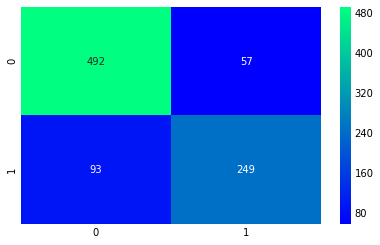

In [71]:
#Visualize the AdaBoost prediction result
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')

plt.show()

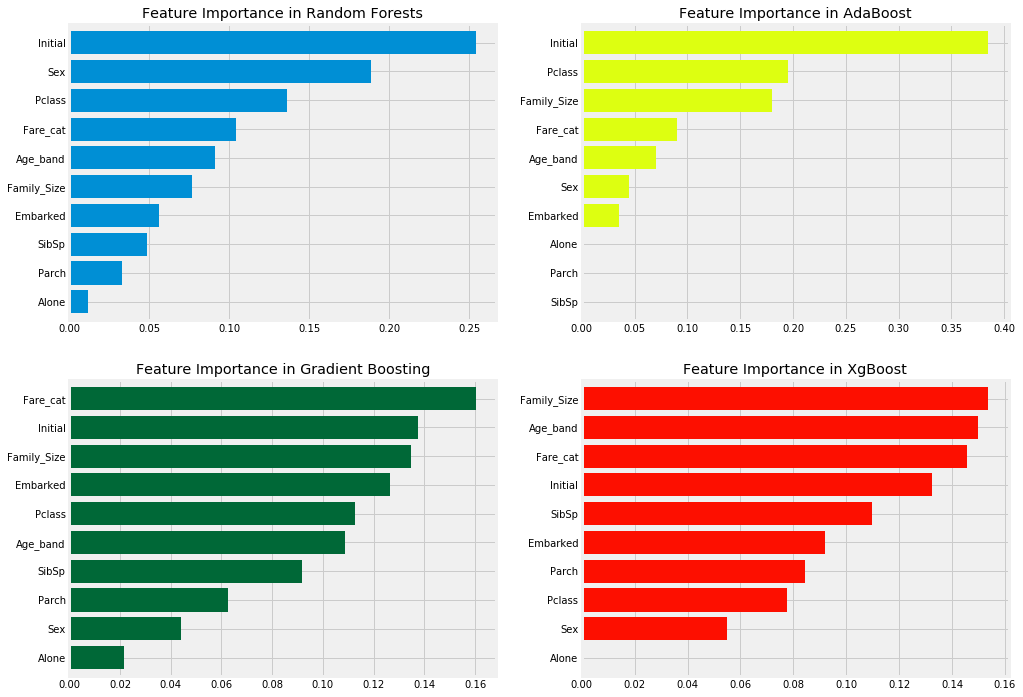

In [72]:
#Feature importance
f, ax = plt.subplots(2, 2, figsize=(15, 12))

model=RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')

plt.show()